In [3]:
import os
import folium
import pandas as pd
import numpy as np
import networkx as nx

from plotnine import *
import matplotlib.pyplot as plt
# jupyter notebook warning 무시하기

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False

import missingno as msno

In [4]:
a = pd.read_csv('../../data/shop/concat_shop.csv', encoding = 'utf-8')

In [5]:
a = a[a['좌표정보(X)'].notnull()]
a.to_csv('../../data/shop/concat_shop.csv', encoding = 'utf-8',sep =',', index=False)

In [6]:
# 대구만 추출
a = a[a['소재지전체주소'].str.contains('대전광역시', case=False, na=False)]
a = a[a['폐업일자'] >= 20200121]
a['구군'] = a['소재지전체주소'].str.split(' ').str[1]

In [7]:
lon = a.groupby('구군')['lon'].mean()
lat = a.groupby('구군')['lat'].mean()
c = a['구군'].unique()

In [8]:
a['std_lon']=''
a['std_lat']=''

In [9]:
for i in a.index:
    a.loc[i,'std_lon'] = lon[a.loc[i,'구군']]
    a.loc[i,'std_lat'] = lat[a.loc[i,'구군']]

In [10]:
c = pd.DataFrame(c, columns=['구군'])
c['빈도'] = ''
c['std_lon'] = ''
c['std_lat'] = ''
for i in c['구군']:
    c.loc[c['구군']==i, '빈도']  = a[a['구군'] == i].count()[0]
    c.loc[c['구군']==i, 'std_lon']  = a[a['구군'] == i]['std_lon'].iloc[0]
    c.loc[c['구군']==i, 'std_lat']  = a[a['구군'] == i]['std_lat'].iloc[0]
  

In [114]:
rout = pd.read_csv('../../data/shop/PatientRoute.csv', encoding= 'utf-8')
rout = rout[rout['province'] == 'Seoul']

In [115]:
lon = rout.groupby('city')['longitude'].mean()
lat = rout.groupby('city')['latitude'].mean()

rout['std_lon']=''
rout['std_lat']=''

for i in rout.index:
    rout.loc[i,'std_lon'] = lon[rout.loc[i,'city']]
    rout.loc[i,'std_lat'] = lat[rout.loc[i,'city']]

gu_list = rout['city'].unique()
d = pd.DataFrame(gu_list, columns=['구군'])

In [116]:
d['빈도'] = ''
d['std_lon'] = ''
d['std_lat'] = ''

for i in d['구군']:
    d.loc[d['구군']==i, '빈도']  = rout[rout['city'] == i].count()[0]
    d.loc[d['구군']==i, 'std_lon']  = rout[rout['city'] == i]['std_lon'].iloc[0]
    d.loc[d['구군']==i, 'std_lat']  = rout[rout['city'] == i]['std_lat'].iloc[0]

In [117]:
list_a = list(c['구군'])
d['구군'] = list_a

c['환자'] = ''
for i in range(len(list_a)):
    c.loc[i, '환자'] = int(d[d['구군'] == c.loc[i, '구군']]['빈도'])

In [118]:
from scipy import stats


x = np.array(c['환자'])
y = np.array(c['빈도'])


In [119]:
]result = stats.linregress(list(x),list(y))
print(result)

LinregressResult(slope=0.16567905281258682, intercept=74.92912227419217, rvalue=0.17262348847136788, pvalue=0.4092861983986029, stderr=0.19712181284691466)


In [59]:
c.to_csv('../../data/shop/서울구별폐업 및 코로나.csv', encoding = 'utf-8', sep=',')

AttributeError: 'numpy.int64' object has no attribute 'to_csv'

In [337]:
# 의미없는 것으로 나옴
# 이제 도시, 구별로 구분
# 기간별 코로나 환자 증가율, 기간별 폐업율 그래프 그리기
# 위세중심성을 넣어서 돌리면???
# 두 지표를 통해서 코로나와 폐업의 상관관계 회귀분석 돌려보기

,구군,빈도,std_lon,std_lat
0,중구,44,128.595,35.8687
1,동구,60,128.651,35.8856
2,서구,73,128.561,35.8726
3,남구,45,128.581,35.8466
4,북구,66,128.582,35.9036
5,수성구,97,128.633,35.8466
6,달서구,98,128.531,35.8337
7,달성군,25,128.457,35.76


#### 구별 20년간 폐업률 변화

In [52]:
a = pd.read_csv('../../data/shop/concat_shop.csv', encoding = 'utf-8')

In [53]:
seoul = a[a['소재지전체주소'].str.contains('서울특별시', na=False)]
s_close = pd.DataFrame()
seoul['폐업일자'].sort_values()

338      20000101.0
83       20000101.0
76       20000101.0
75       20000101.0
73       20000101.0
            ...    
39206    20200331.0
59850    20200331.0
39210    20200331.0
59925    20200331.0
39535    20200331.0
Name: 폐업일자, Length: 49678, dtype: float64

In [54]:
seoul['구'] = seoul['소재지전체주소'].apply(lambda x:x.split(' ')[1])
gu = list(seoul['구'].unique())

In [55]:
for i in range(0,200001,10000):
    for j in gu:
        c = seoul[(seoul['폐업일자'] >=20000101.0+i)
                  &(seoul['폐업일자'] <20010101.0+i)
                  &(seoul['구'] == j)
                 ].count()[0]
        s_close.loc[j,'{}'.format(2000+i/10000)] = c

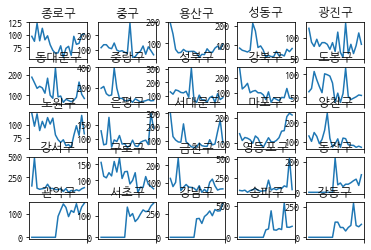

In [56]:
# 구별 폐업수 
for i in range(len(s_close)):
    plt.subplot(5,5,i+1)
    plt.plot(s_close.iloc[i,:])
    plt.title(gu[i])
    plt.xticks('')
    

In [57]:
for i in gu:
    if s_close.loc[i,'2019.0'] < s_close.loc[i,'2020.0']:
        s_close.loc[i,'폐업증가'] = '1'
    else :
        s_close.loc[i,'폐업증가'] = '0'

In [58]:
s_close =s_close.reset_index()
s_close.rename(columns ={'index':'구군'}, inplace=True)

In [62]:
s_close.to_csv('../../data/shop/서울년도별폐업.csv', sep=',', encoding='utf-8', index=False)

In [91]:
cate = list(seoul['업태구분명'].unique())
s_cate = pd.DataFrame()
for i in cate:
    for j in gu:
        c = seoul[(seoul['업태구분명'] == i)
                  &(seoul['구'] == j)
                 ].count()[0]
        s_cate.loc[j,'{}'.format(i)] = c
        

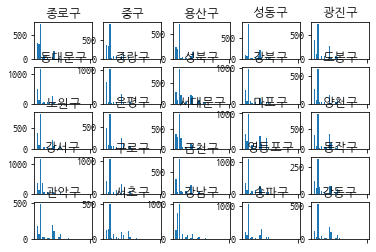

In [92]:
# 구별 폐업업종수 
# 이건 폐업률을 보는게 맞을듯?
for i in range(len(s_cate)):
    plt.subplot(5,5,i+1)
    plt.bar(s_cate.columns,s_cate.iloc[i,:])
    plt.title(gu[i])
    plt.xticks('')

In [ ]:
s_cate.to_csv('../../data/shop/구별폐업업종수.csv', encoding='utf-8',sep=',')s_cate.to_csv('../../data/shop/구별폐업업종수.csv', encoding='utf-8',sep=',')


### 년도별 1~3월 폐업률

In [17]:
df = pd.read_csv('../../data/shop/open_shop.csv', encoding='utf-8')

In [18]:
seoul = df[df['소재지전체주소'].str.contains('서울특별시', na=False)]
seoul['구'] = seoul['소재지전체주소'].apply(lambda x:x.split(' ')[1])
gu = list(seoul['구'].unique())

In [19]:
# 2019년도 폐업가계/전체가계
# 전체가계 = 영업or 폐업일자가 20190101보다 높은 계체 x and 인허가일자가 20190331이하

s_close = pd.DataFrame()
    
for i in range(0,200001,10000):
    for j in gu:
        c = seoul[(seoul['인허가일자']<= 20000331+i)
                  &(seoul['구'] == j)]
        open_shop = c[(c['상세영업상태명']=='영업')
                      |(c['폐업일자']>=20000101+i)]
                        
        open_shop_n = open_shop.count()[0]
        close_shop_n = seoul[(seoul['폐업일자'] >=20000101+i)
                      &(seoul['폐업일자'] <=20000331+i)
                            &(seoul['구'] == j)].count()[0]                
                        
                        
        s_close.loc[j,'{}'.format(2000+i/10000)] = close_shop_n/open_shop_n

In [ ]:
for i in range(len(s_close)):
    plt.subplot(5,5,i+1)
    plt.plot(s_close.iloc[i,:])
    plt.title(gu[i])
    plt.xticks('')
   

In [28]:
# 년도별 전체 폐업률의 증감
b = s_close.reset_index()
b.rename(columns= {'index': '구군'}, inplace = True)
b['폐업증가'] = ''
for i in range(25):
    if b.loc[i,'2019.0'] >b.loc[i,'2020.0']:
        b.loc[i,'폐업증가'] = 0
    else:
        b.loc[i,'폐업증가'] = 1


,구군,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,폐업증가
0,종로구,0.019836,0.017223,0.025271,0.016743,0.021950,0.016435,0.017696,0.014364,0.014166,...,0.008761,0.011279,0.012562,0.009024,0.014438,0.011942,0.011731,0.013966,0.014124,1
1,도봉구,0.027106,0.028884,0.039065,0.032008,0.025376,0.020785,0.034837,0.034156,0.033981,...,0.015306,0.023329,0.046669,0.021224,0.018511,0.019802,0.020996,0.022231,0.022014,0
2,강남구,0.032660,0.021362,0.020157,0.016782,0.019647,0.158657,0.023096,0.019227,0.019026,...,0.013881,0.020404,0.022155,0.024597,0.019949,0.025259,0.024260,0.024098,0.032279,1
3,중구,0.022459,0.027515,0.024947,0.021739,0.021069,0.029533,0.019550,0.017599,0.020105,...,0.009498,0.009347,0.013725,0.015461,0.021607,0.011396,0.019688,0.015047,0.010299,0
4,용산구,0.063257,0.049815,0.023404,0.017825,0.019366,0.022248,0.019619,0.020226,0.020199,...,0.014294,0.014250,0.021047,0.015480,0.014003,0.017981,0.019336,0.015457,0.020581,1
5,성동구,0.029167,0.026823,0.022046,0.022707,0.023963,0.070175,0.058695,0.031572,0.036858,...,0.015896,0.015445,0.024819,0.015910,0.017596,0.014959,0.024806,0.020481,0.023562,1
6,광진구,0.031569,0.024236,0.021534,0.024495,0.021403,0.021924,0.021801,0.020749,0.018602,...,0.016638,0.013034,0.032893,0.015141,0.020038,0.014982,0.019340,0.026053,0.019680,0
7,동대문구,0.040267,0.035022,0.026282,0.028661,0.027667,0.022071,0.036988,0.021595,0.018085,...,0.014426,0.017908,0.016115,0.014678,0.016630,0.020119,0.037957,0.024538,0.019816,0
8,중랑구,0.046714,0.049965,0.032658,0.027221,0.027929,0.088085,0.046200,0.023438,0.023986,...,0.014570,0.024176,0.019603,0.014679,0.016640,0.018283,0.021408,0.018143,0.018959,1
9,성북구,0.036283,0.030630,0.036949,0.037491,0.033836,0.032325,0.033687,0.026667,0.091306,...,0.018059,0.017367,0.013682,0.021643,0.024126,0.012773,0.029250,0.018644,0.021668,1


In [29]:
b.to_csv('../../data/shop/서울년도별폐업률.csv',index=False, sep=',', encoding='utf-8')
b.to_csv('../../data/shop/서울년도별폐업률_R.csv',index=False, sep=',', encoding='ANSI')

In [68]:
# 구별 연령층도 비교에 넣고 싶은뎅..
gu_p = pd.read_csv('../../data/shop/PatientRoute.csv')
b = pd.read_csv('../../data/shop/서울년도별폐업.csv', encoding='utf-8')
corona = pd.read_csv('../../data/shop/서울구별폐업 및 코로나.csv')

In [34]:
corona_1 = pd.merge(corona, b[['구군','폐업증가']], on='구군')
corona_1

,구군,빈도,std_lon,std_lat,환자,폐업증가
0,종로구,90,126.987756,37.575600,87,1
1,중구,44,126.990750,37.563464,42,0
2,용산구,76,126.983612,37.536798,44,1
3,성동구,72,127.042443,37.552906,140,1
4,광진구,67,127.081609,37.546002,129,0
5,동대문구,68,127.052465,37.581671,231,0
6,중랑구,55,127.086651,37.597194,89,1
7,성북구,70,127.025314,37.599733,103,1
8,강북구,48,127.023437,37.631976,59,0
9,도봉구,50,127.038433,37.659036,70,0


In [ ]:
# 전년도 대비 폐업이 증가했는가
corona_1.to_csv('../../data/shop/서울구별폐업 종합본.csv',encoding='utf-8',index=False)

In [122]:
# 서울 폐업시각화
a = pd.read_csv('../../data/shop/서울년도별폐업.csv')

In [123]:
# 데이터의 구 순서를 맞추는 작업
g = []
l = list(a['구군'].unique())

In [124]:
for i in l:
    g.append(int(corona_1[corona_1['구군'] == i]['환자']))
g_1 = pd.DataFrame(g)
g_1[0]

0      87
1      42
2      44
3     140
4     129
5     231
6      89
7     103
8      59
9      70
10    103
11    115
12     24
13    181
14     30
15    149
16     43
17     92
18     33
19     66
20     88
21     75
22     71
23    148
24     44
Name: 0, dtype: int64

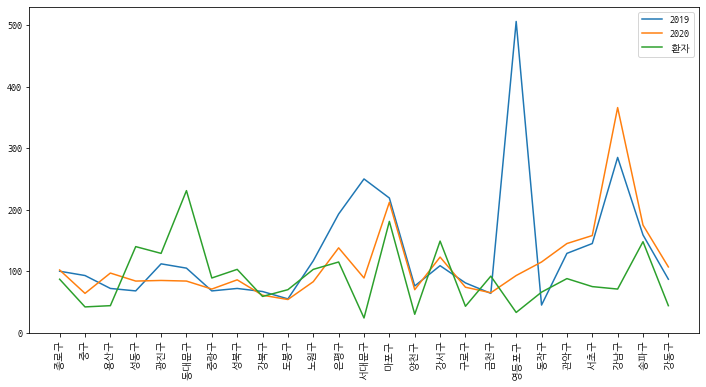

In [128]:
plt.figure(figsize=(12, 6))
plt.plot(a['2019.0'], label= '2019')
plt.plot(a['2020.0'], label='2020')
plt.plot(g_1[0],label='환자')
plt.xticks(np.arange(0,25), a['구군'],rotation=90)
plt.legend()

In [141]:
# 구별 가중치 넣기
gu_mean = pd.read_csv('../../data/shop/서울구별가중치평균.csv', encoding = 'utf-8')
corona_2 = pd.read_csv('../../data/shop/서울구별폐업 종합본.csv',encoding='utf-8')

In [ ]:
corona_3  = pd.merge(corona_2, gu_mean[['w','w1']], on='구군')

In [152]:
corona_2['구군']

0      종로구
1       중구
2      용산구
3      성동구
4      광진구
5     동대문구
6      중랑구
7      성북구
8      강북구
9      도봉구
10     노원구
11     은평구
12    서대문구
13     마포구
14     양천구
15     강서구
16     구로구
17     금천구
18    영등포구
19     동작구
20     관악구
21     서초구
22     강남구
23     송파구
24     강동구
Name: 구군, dtype: object

In [153]:
gu_mean['구군']

0      강남구
1      강동구
2      강서구
3      경북구
4      관악구
5      광진구
6      구로구
7      금천구
8      노원구
9      도봉구
10    동대문구
11     동작구
12     마포구
13    서대문구
14     서초구
15     성동구
16     성북구
17     송파구
18     양천구
19    영등포구
20     용산구
21     은평구
22     종로구
23      중구
24     중랑구
Name: 구군, dtype: object

In [139]:
corona_2

,구군,빈도,std_lon,std_lat,환자,폐업증가
0,종로구,90,126.987756,37.575600,87,1
1,중구,44,126.990750,37.563464,42,0
2,용산구,76,126.983612,37.536798,44,1
3,성동구,72,127.042443,37.552906,140,1
4,광진구,67,127.081609,37.546002,129,0
5,동대문구,68,127.052465,37.581671,231,0
6,중랑구,55,127.086651,37.597194,89,1
7,성북구,70,127.025314,37.599733,103,1
8,강북구,48,127.023437,37.631976,59,0
9,도봉구,50,127.038433,37.659036,70,0
